# Logistic Regression for Classification in a Single-Neuron Model

Logistic regression is a statistical method used for binary classification problems. It predicts the probability that a given input belongs to a particular class. In a single-neuron model, logistic regression uses a sigmoid activation function to map the input features to a probability value between 0 and 1.

## Sigmoid Function

The sigmoid function is defined as:

$ \sigma(z) = \frac{1}{1 + e^{-z}} $

where $ z $ is the input to the neuron, which is a linear combination of the input features and their corresponding weights. The sigmoid function outputs a value between 0 and 1, which can be interpreted as the probability of the input belonging to the positive class.

## Loss Function

The loss function used in logistic regression is the binary cross-entropy loss, also known as the log loss. It measures the difference between the predicted probabilities and the actual class labels. The binary cross-entropy loss is defined as:

$ L(y, \hat{y}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $

where $ y $ is the actual class label, $ \hat{y} $ is the predicted probability, and $ m $ is the number of training examples.

## Gradient Descent

Gradient descent is an optimization algorithm used to minimize the loss function by iteratively updating the model's weights. The weights are updated in the direction of the negative gradient of the loss function with respect to the weights. The update rule for the weights is given by:

$ w = w - \alpha \frac{\partial L}{\partial w} $

where $ w $ is the weight vector, $ \alpha $ is the learning rate, and $ \frac{\partial L}{\partial w} $ is the gradient of the loss function with respect to the weights.

By iteratively applying gradient descent, the model's weights are adjusted to minimize the loss function, thereby improving the model's predictions.




### Import and Clean Data

We will use a Rice dataset for this. The dataset includes two types of rice (Cammeo and Osmancik), each of which have 7 measured, real-numbered features: 
- Area	
- Perimeter	
- Major_Axis_Length	
- Minor_Axis_Length
- Eccentricity
- Convex_Area	
- Extent	

Let's put our features into a dataframe and clean it up a little.

# Understanding Traditional Gradient Descent vs. Stochastic Gradient Descent in Logistic Regression

When training a logistic regression model, the goal is to find parameters (weights and bias) that minimize a given loss function—often the negative log-likelihood (also known as the cross-entropy loss). To update these parameters, gradient descent methods are commonly employed. Two prominent variants are **Traditional (Batch) Gradient Descent** and **Stochastic Gradient Descent (SGD)**. While both aim to minimize the loss, they differ in how they estimate and leverage the gradient of the loss function.

## Traditional (Batch) Gradient Descent

**What It Is:**  
Traditional gradient descent uses the **entire training dataset** to compute the gradient of the loss function at each step.

**How It Works:**
1. **Forward Pass:** Compute the predictions for all training examples using the current parameters.
2. **Loss Calculation:** Determine the overall loss by summing (or averaging) the individual losses over the entire training dataset.
3. **Gradient Computation:** Derive the gradient of the loss with respect to each parameter using all the data points.
4. **Parameter Update:** Adjust all parameters simultaneously based on the computed gradients.

## Stochastic Gradient Descent (SGD)

**What It Is:**  
Stochastic Gradient Descent uses a **single randomly selected training example** at each update step rather than the entire dataset.

**How It Works:**
1. **Random Sampling:** Select a single training example (or a small minibatch) at random.
2. **Forward Pass:** Compute the prediction and loss for this example or minibatch.
3. **Gradient Computation:** Calculate the gradient of the loss with respect to parameters based only on these few samples.
4. **Parameter Update:** Immediately adjust the parameters with this computed gradient.


## Choosing Between the Two

- **Batch Gradient Descent**: More appropriate for smaller, manageable datasets where computational overhead is not severe. It provides more stable convergence but at the cost of computational efficiency.

- **Stochastic Gradient Descent**: Preferred for large-scale problems and scenarios where data is continuously generated or updated. Although it introduces noisier updates, it can significantly speed up training and often achieves similar or better results with proper tuning and regularization.

In practice, a hybrid method called **Mini-Batch Gradient Descent** is often used, which offers a balance between the stability of batch gradient descent and the faster convergence of pure stochastic methods. Here, the gradient is computed on small, fixed-size batches of data, providing a good compromise in many cases.


In [382]:
from scipy.io import arff
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the .arff file
data, meta = arff.loadarff('rice.arff')

# Convert to pandas dataframe
df = pd.DataFrame(data)

# # Print the first few rows of the dataframe
# print(df.head())

# Encode the 'Class' column
df['Class'] = df['Class'].apply(lambda x: 0 if x == b'Osmancik' else 1)

# Print the first few rows of the dataframe to verify the changes
print(df.head())

      Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   
1  14656.0  494.311005         206.020065          91.730972      0.895405   
2  14634.0  501.122009         214.106781          87.768288      0.912118   
3  13176.0  458.342987         193.337387          87.448395      0.891861   
4  14688.0  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent  Class  
0      15617.0  0.572896      1  
1      15072.0  0.615436      1  
2      14954.0  0.693259      1  
3      13368.0  0.640669      1  
4      15262.0  0.646024      1  


Let's plot some data so we have something to look at. We will plot the features "Perimeter" vs. "Eccentricity" and color the 

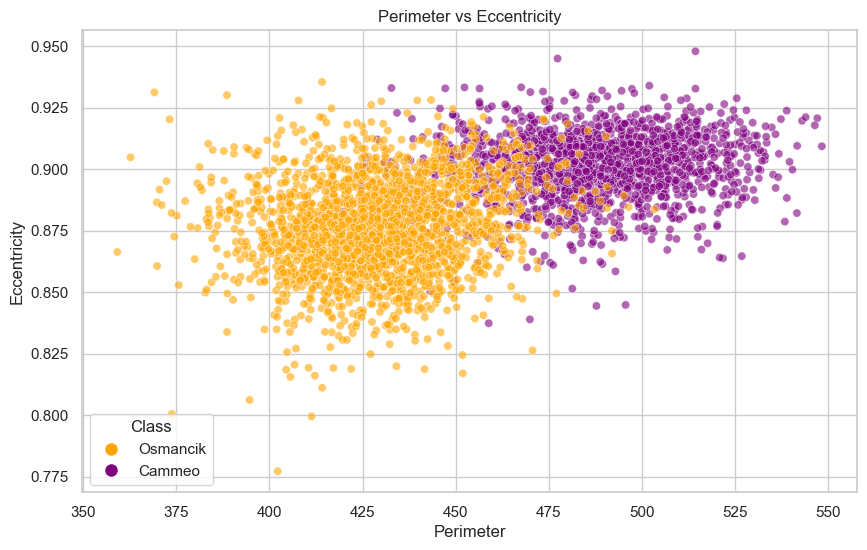

In [383]:
# Set the theme
sns.set_theme(style="whitegrid")

# Plot the data
plt.figure(figsize=(10, 6))
colors = df['Class'].map({0: 'orange', 1: 'purple'})
plt.scatter(df['Perimeter'], df['Eccentricity'], c=colors, alpha=0.6, edgecolor='w', linewidth=0.5)

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Osmancik'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Cammeo')]
plt.legend(title='Class', handles=handles)

plt.xlabel('Perimeter')
plt.ylabel('Eccentricity')
plt.title('Perimeter vs Eccentricity')
plt.show()

Beautiful, I love the colors! Seaborn is such a wonderful package. Let's shrink the sample size a little though, for simplicity. 

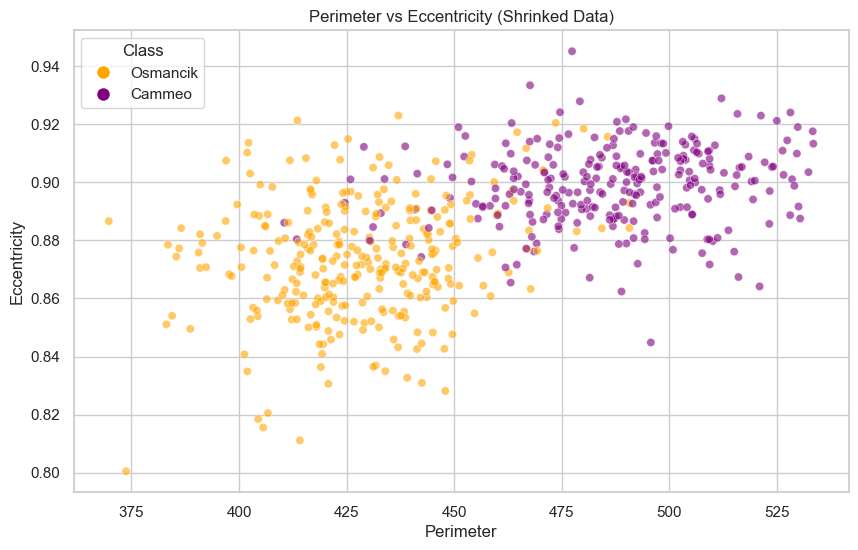

In [384]:
# Shrink the dataframe by 85%
df = df.sample(frac=0.15, random_state=1).reset_index(drop=True)

# Extract the features and the target variable from the shrinked dataframe
X = df[['Perimeter', 'Eccentricity']].values
y = df['Class'].values

# Shuffle the shrinked dataframe rows
df = df.sample(frac=1).reset_index(drop=True)

# Plot the shrinked data
plt.figure(figsize=(10, 6))
colors_shrinked = df['Class'].map({0: 'orange', 1: 'purple'})
plt.scatter(df['Perimeter'], df['Eccentricity'], c=colors_shrinked, alpha=0.6, edgecolor='w', linewidth=0.5)
plt.xlabel('Perimeter')
plt.ylabel('Eccentricity')
plt.title('Perimeter vs Eccentricity (Shrinked Data)')

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Osmancik'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Cammeo')]
plt.legend(title='Class', handles=handles)

plt.show()

Great, now let's create a class for our logistic regression model. This will be done with a single neuron. 

In [ ]:
class LogisticRegressionSingleNeuron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, y_true, y_pred):
        m = len(y_true)
        return -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y, print_epoch=False): # Stochastic Gradient Descent
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for epoch in range(self.epochs):
            for i in range(m):  # m is the number of training examples
                xi = X[i, :].reshape(1, -1)
                yi = y[i]

                linear_model = np.dot(xi, self.weights) + self.bias # feed forward
                y_pred = self.sigmoid(linear_model)

                dw = np.dot(xi.T, (y_pred - yi)) # gradient descent
                db = y_pred - yi

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            if print_epoch:
                if epoch % 100 == 0:
                    total_error = self.loss(y, self.sigmoid(np.dot(X, self.weights) + self.bias))
                    print(f'Epoch {epoch}, Total Error: {total_error}')

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        return [1 if i > 0.5 else 0 for i in y_pred_proba]

The Idea with logistic regression is to map a sigomoid function close to datapoints through successive iterations. Below, we graph a single feature (Perimeter) and a sigmoid function. The idea is to get these close.

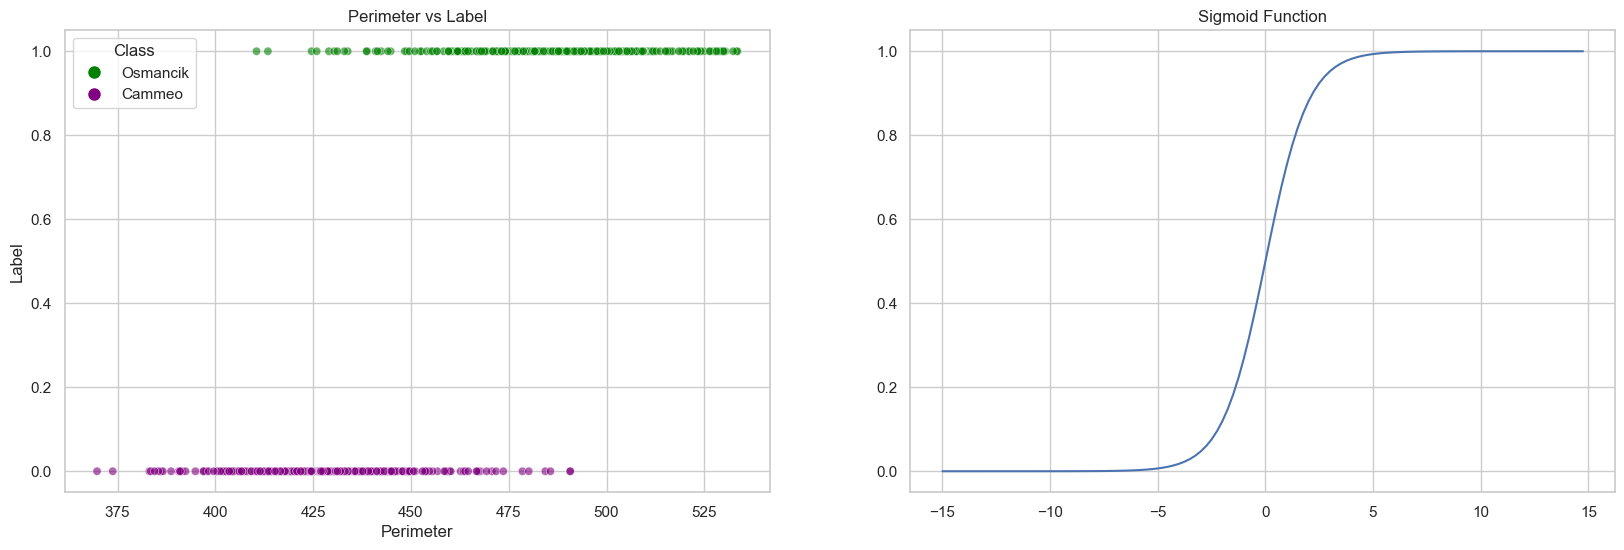

In [386]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plot the 'Perimeter' values vs the 'Label' on the first subplot
colors = df['Class'].map({0: 'purple', 1: 'green'})
ax[0].scatter(df['Perimeter'], df['Class'], c=colors, alpha=0.6, edgecolor='w', linewidth=0.5)
ax[0].set_xlabel('Perimeter')
ax[0].set_ylabel('Label')
ax[0].set_title('Perimeter vs Label')

# Add legend to the first subplot
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Osmancik'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Cammeo')]
ax[0].legend(title='Class', handles=handles)

# Plot the sigmoid function on the second subplot
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

dom = np.arange(-15, 15, .25)
ax[1].plot(dom, sigmoid(dom))
ax[1].set_title('Sigmoid Function')

# Show the plots
plt.show()

Let's perform this task. We will run our data through our model stochastic gradient descent function (defined as fit in the LogisticRegressorSingleNeuron class). Always remember to scale the features!!

Epoch 0, Total Error: 0.2233089786615973
Epoch 100, Total Error: 0.22173842973495872
Epoch 200, Total Error: 0.22173842973495872
Epoch 300, Total Error: 0.22173842973495872
Epoch 400, Total Error: 0.22173842973495872
Epoch 500, Total Error: 0.22173842973495872
Epoch 600, Total Error: 0.22173842973495872
Epoch 700, Total Error: 0.22173842973495872
Epoch 800, Total Error: 0.22173842973495872
Epoch 900, Total Error: 0.22173842973495872
Epoch 1000, Total Error: 0.22173842973495872
Epoch 1100, Total Error: 0.22173842973495872
Epoch 1200, Total Error: 0.22173842973495872
Epoch 1300, Total Error: 0.22173842973495872
Epoch 1400, Total Error: 0.22173842973495872
Epoch 1500, Total Error: 0.22173842973495872
Epoch 1600, Total Error: 0.22173842973495872
Epoch 1700, Total Error: 0.22173842973495872
Epoch 1800, Total Error: 0.22173842973495872
Epoch 1900, Total Error: 0.22173842973495872


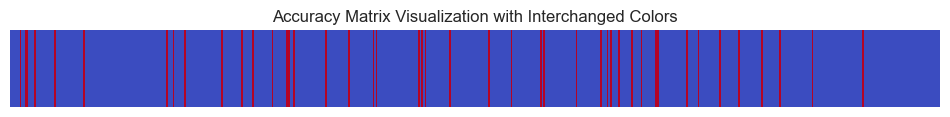

Accuracy: 92.13%


In [387]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Shuffle the dataframe rows
df = df.sample(frac=1).reset_index(drop=True)

# Extract the features and the target variable
X = df[['Perimeter', 'Eccentricity']].values
y = df['Class'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the logistic regression model
model = LogisticRegressionSingleNeuron(learning_rate=0.1, epochs=2000)

# Fit the model to the data
model.fit(X_scaled, y, print_epoch=True)


# Make predictions
predictions = model.predict(X_scaled)

# # Print the first 10 predictions
# print(predictions[:10])

# # Print the last 10 predictions
# print(predictions[-10:])

# Create a boolean matrix representing the accuracy
accuracy_matrix = predictions == y

# # Print the accuracy matrix
# print(accuracy_matrix)

# Visualize the accuracy matrix with interchanged colors
plt.figure(figsize=(12, 1))
sns.heatmap(accuracy_matrix.reshape(1, -1), cmap='coolwarm_r', cbar=False, xticklabels=False, yticklabels=False)
plt.title('Accuracy Matrix Visualization with Interchanged Colors')
plt.show()

# Calculate the accuracy
accuracy = np.mean(accuracy_matrix)
print(f'Accuracy: {accuracy * 100:.2f}%')


In this figure, the red lines represent the places where the model incorrectly predicted the labels. We have pretty good accuracy overall; the graph is mostly blue and the accuracy comes out to $\approx 92\%$

### Eccentricity Vs. Perimeter

When we perform the regression using only the eccentricity column, and then only the perimeter column, we find that the model performs much more accurately when using the perimeter data. This is because in this case, the perimeter is a better heuristic at classifying the two types of rice. 

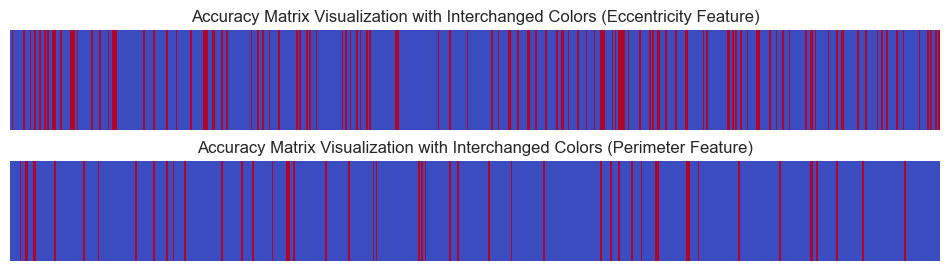

Accuracy (Eccentricity): 78.50%
Accuracy (Perimeter): 91.26%


In [388]:
# Extract the "Perimeter" feature and the target variable
X_perimeter = df[['Perimeter']].values
y = df['Class'].values

# Scale the "Perimeter" feature
X_perimeter_scaled = scaler.fit_transform(X_perimeter)

# Initialize the logistic regression model
model_perimeter = LogisticRegressionSingleNeuron(learning_rate=0.1, epochs=2000)

# Fit the model to the data
model_perimeter.fit(X_perimeter_scaled, y)

# Make predictions
predictions_perimeter = model_perimeter.predict(X_perimeter_scaled)

# Create a boolean matrix representing the accuracy
accuracy_matrix_perimeter = predictions_perimeter == y

# Visualize the accuracy matrices side-by-side
fig, ax = plt.subplots(2, 1, figsize=(12, 3))

sns.heatmap(accuracy_matrix_eccentricity.reshape(1, -1), cmap='coolwarm_r', cbar=False, xticklabels=False, yticklabels=False, ax=ax[0])
ax[0].set_title('Accuracy Matrix Visualization with Interchanged Colors (Eccentricity Feature)')

# Add white space between the subplots
fig.subplots_adjust(hspace=0.3)

sns.heatmap(accuracy_matrix_perimeter.reshape(1, -1), cmap='coolwarm_r', cbar=False, xticklabels=False, yticklabels=False, ax=ax[1])
ax[1].set_title('Accuracy Matrix Visualization with Interchanged Colors (Perimeter Feature)')

plt.show()


# Calculate the accuracy
accuracy_eccentricity = np.mean(accuracy_matrix_eccentricity)
print(f"Accuracy (Eccentricity): {accuracy_eccentricity * 100:.2f}%")

accuracy_perimeter = np.mean(accuracy_matrix_perimeter)
print(f'Accuracy (Perimeter): {accuracy_perimeter * 100:.2f}%')